In [1]:
pip install --upgrade yfinance pandas pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
start = "2006-01-01"
end = "2016-01-01"
bank_data = {}

In [5]:
for i in tickers:
    bank_data[i] = yf.download(i, start, end)
    
print(bank_data['BAC'].head(5))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker            BAC        BAC        BAC        BAC       BAC
Date                                                            
2006-01-03  31.173679  31.239893  30.557886  31.067734  16296700
2006-01-04  30.842598  31.279612  30.756519  31.120697  17757900
2006-01-05  30.882324  31.008133  30.670439  30.842597  14970700
2006-01-06  30.835981  31.061110  30.690309  30.988274  12599800
2006-01-09  30.855846  31.100841  30.696934  30.935305  15619400


In [6]:
bank_stocks = pd.concat(bank_data, axis = 1, keys = tickers)
bank_stocks.columns = bank_stocks.columns.droplevel(0) 
bank_stocks.head(5)

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC,C,C,C,C,C,...,MS,MS,MS,MS,MS,WFC,WFC,WFC,WFC,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,31.173679,31.239893,30.557886,31.067734,16296700,324.013062,324.604682,316.256214,322.106720,1537600,...,32.190910,32.290282,31.324168,31.561554,5377000,18.778109,18.822258,18.363107,18.601512,11016400
2006-01-04,30.842598,31.279612,30.756519,31.120697,17757900,318.031067,322.764071,317.833867,321.186410,1870960,...,32.212994,32.726414,32.212994,32.406218,7977800,18.560305,18.731014,18.463176,18.719241,10870000
2006-01-05,30.882324,31.008133,30.670439,30.842597,14970700,319.608856,320.660618,318.162654,318.425595,1143160,...,32.301338,32.345504,32.030827,32.323421,5778000,18.539703,18.575022,18.430801,18.542646,10158000
2006-01-06,30.835981,31.061110,30.690309,30.988274,12599800,319.608856,321.449459,316.847933,321.317978,1370210,...,32.334465,32.489043,32.047391,32.444879,6889800,18.648602,18.704523,18.474948,18.589736,8403800
2006-01-09,30.855846,31.100841,30.696934,30.935305,15619400,318.096954,320.397718,317.505334,319.477416,1680740,...,32.676723,32.731931,32.362047,32.367568,4144500,18.645657,18.733956,18.575019,18.645657,5619600


In [7]:
close = bank_stocks.xs('Close', axis = 1, level = 'Price')
close.head()

Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,31.173679,324.013062,95.293083,24.241716,32.190910,18.778109
2006-01-04,30.842598,318.031067,93.976921,24.101810,32.212994,18.560305
2006-01-05,30.882324,319.608856,93.939934,24.174791,32.301338,18.539703
2006-01-06,30.835981,319.608856,95.270897,24.345137,32.334465,18.648602
2006-01-09,30.855846,318.096954,96.417076,24.740545,32.676723,18.645657


In [8]:
max_date = close.idxmax()
max_price = close.max()

max_table = pd.DataFrame({
    'max_date':max_date,
    'max_price':max_price
})
max_table

,max_date,max_price
Ticker,,
BAC,2007-10-05,37.699581
C,2006-12-27,386.292755
GS,2007-10-31,186.076096
JPM,2015-07-22,53.933922
MS,2007-06-14,50.462826
WFC,2015-07-22,44.268089


In [20]:
returns = pd.DataFrame()

for ticker in tickers:
    returns[ticker + '_return'] = bank_stocks[('Close', ticker)].pct_change()

returns.head()

,BAC_return,C_return,GS_return,JPM_return,MS_return,WFC_return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010621,-0.018462,-0.013812,-0.005771,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000394,0.003028,0.002743,-0.001110
2006-01-06,-0.001501,0.000000,0.014168,0.007046,0.001026,0.005874
2006-01-09,0.000644,-0.004730,0.012031,0.016242,0.010585,-0.000158


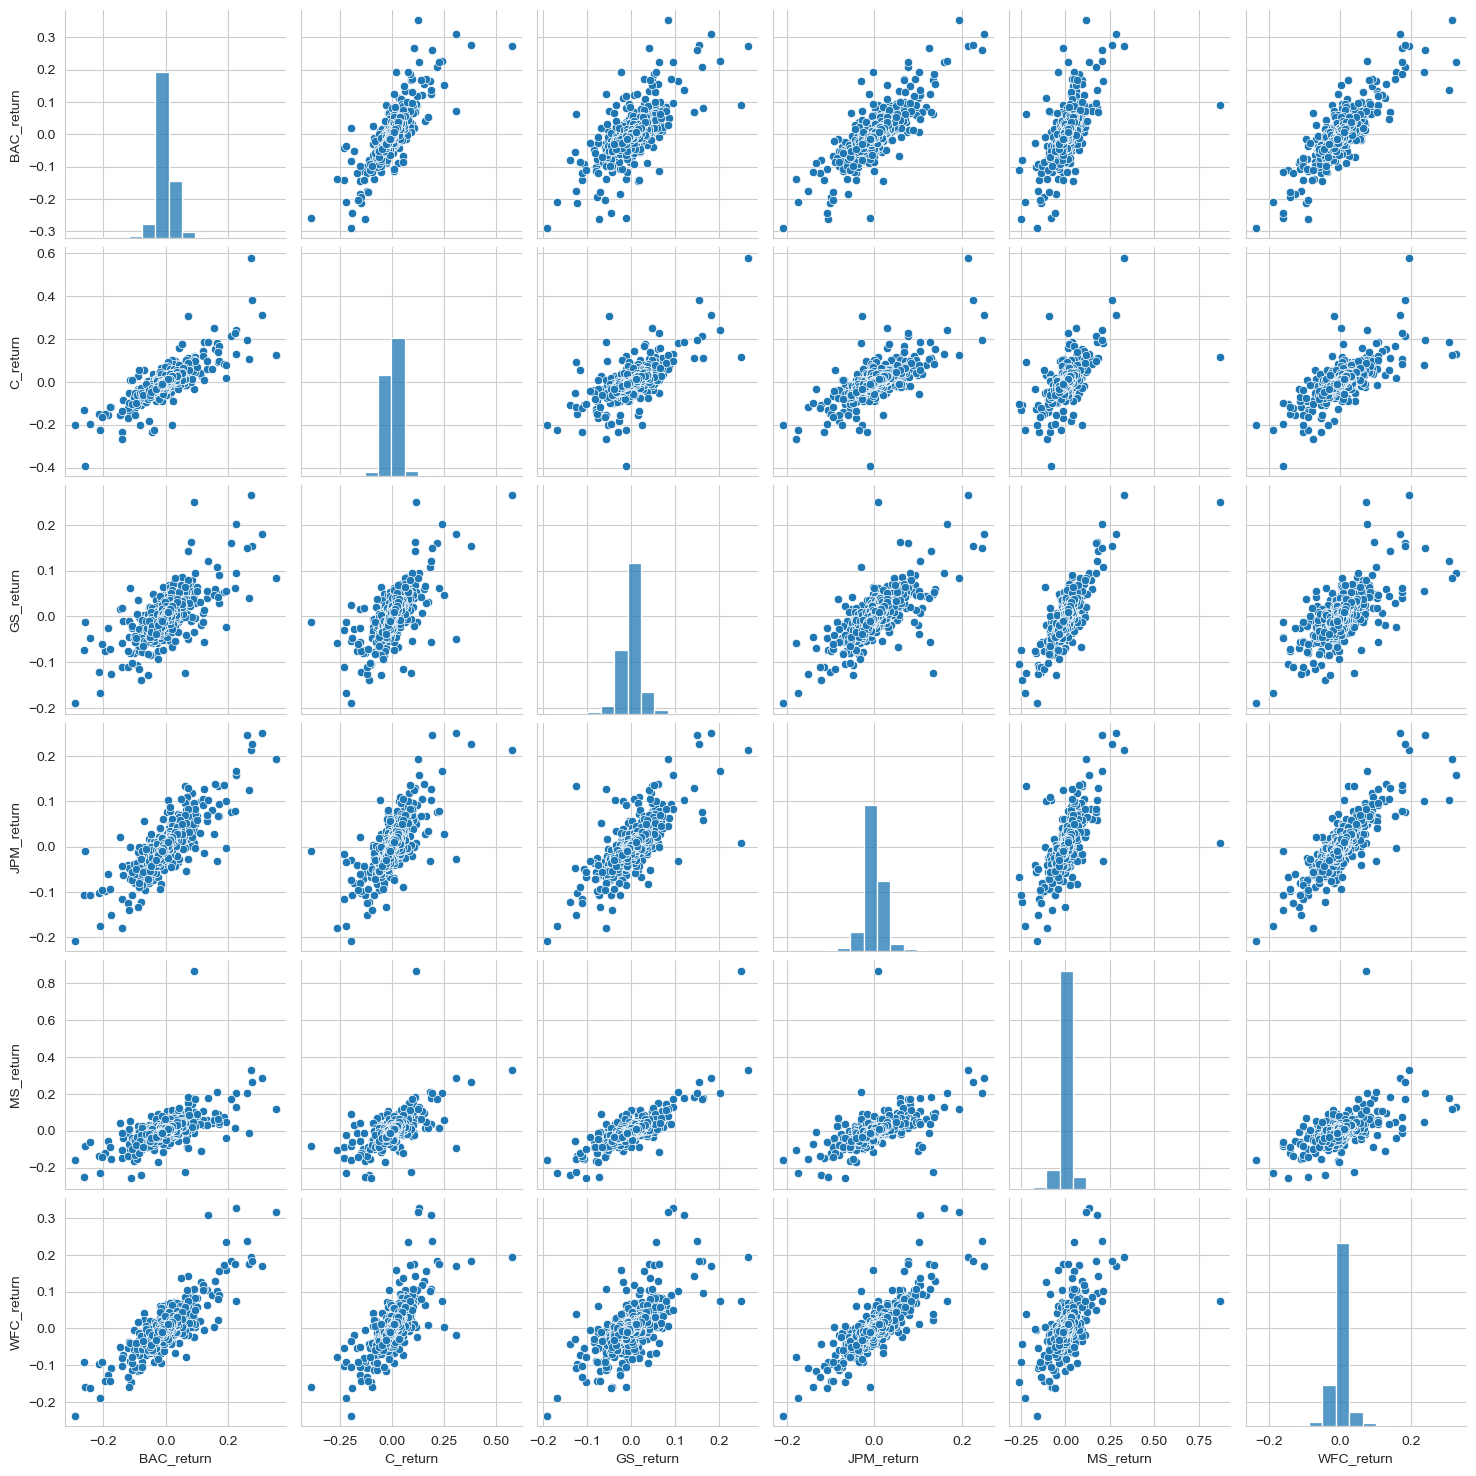

In [23]:
sns.set_style('whitegrid')
sns.pairplot(returns[1:], diag_kind='hist', diag_kws={'bins': 15})

In [31]:
min_date = returns.idxmin()
min_price = returns.min()

min_table = pd.DataFrame({
    'min_date':min_date,
    'min_price':min_price
})
min_table

,min_date,min_price
BAC_return,2009-01-20,-0.289694
C_return,2009-02-27,-0.390244
GS_return,2009-01-20,-0.189596
JPM_return,2009-01-20,-0.207274
MS_return,2008-10-09,-0.258929
WFC_return,2009-01-20,-0.238222


In [26]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC_return    0.016174
C_return      0.015288
GS_return     0.014043
JPM_return    0.014006
MS_return     0.016287
WFC_return    0.012552
dtype: float64

<Axes: xlabel='MS_return', ylabel='Density'>

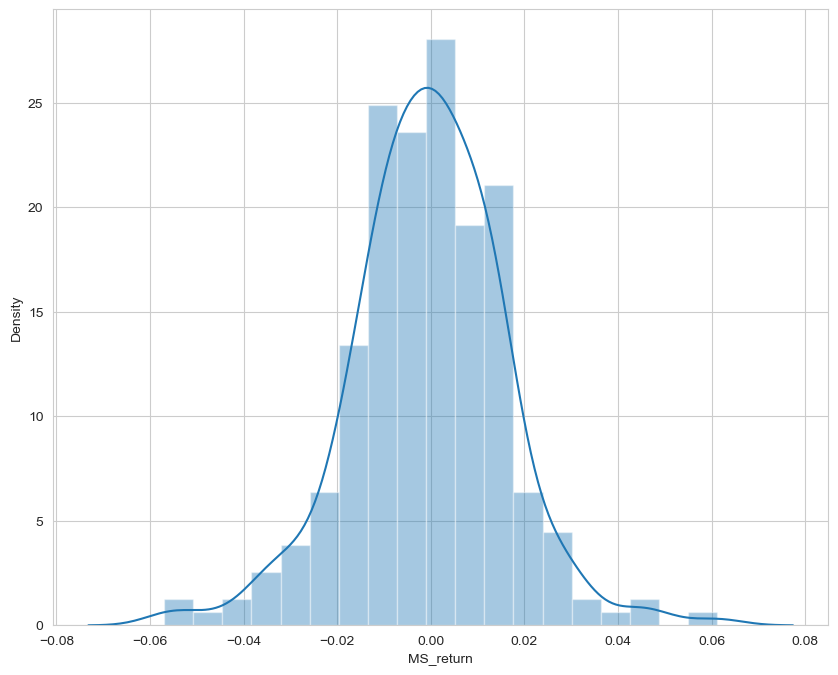

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS_return'])

<Axes: xlabel='C_return', ylabel='Density'>

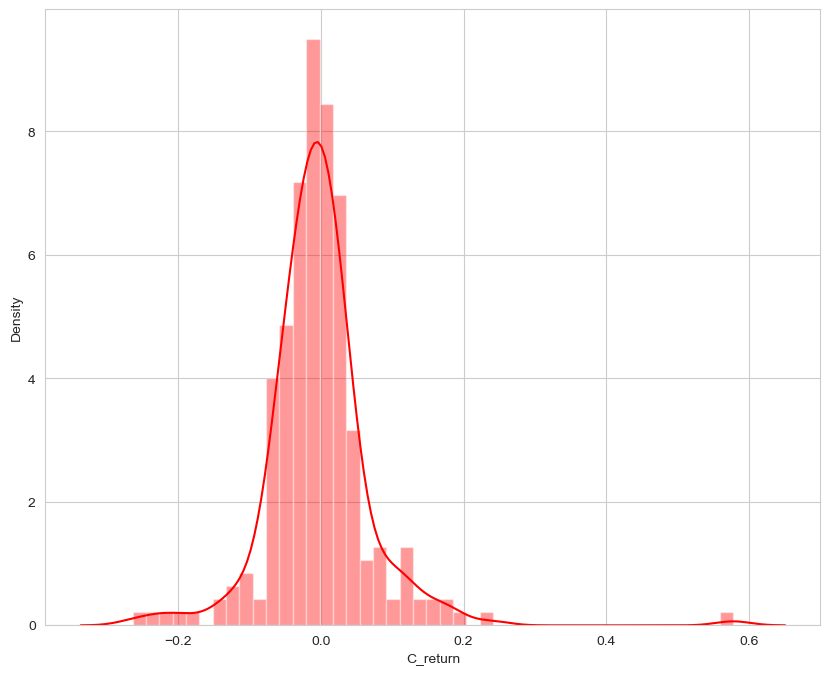

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C_return'], color='red')

In [34]:
!pip install plotly
!pip install cufflinks

import plotly
import cufflinks as cf
cf.go_offline()

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/81.7 kB 262.6 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/81.7 kB 409.6 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 510.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for colorlover>=0.2.1 from https://files.pythonhosted.org/packages/9a/53/f696e4480b1d1de3b1523991dea71cf417c8b19fe70c704da164f3f90972/colorlover-0.3.0-py3-none-any.whl.metadata
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=6088a61efaac511b0d4543e11e892e0475d9a61c67a6d208b03b94e228f0c15b
  Stored in directory: c:\users\anri wang\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfull

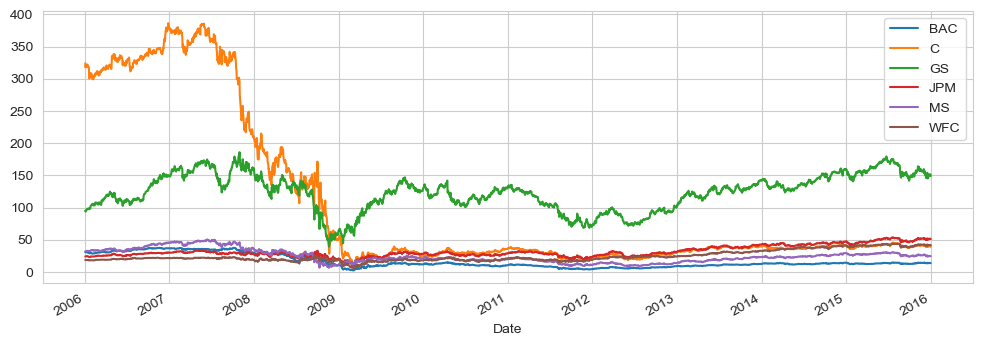

In [39]:
bank_stocks.xs('Close', axis = 1, level ='Price').plot(figsize=(12,4))
plt.legend(loc = 'upper right')

In [40]:
bank_stocks.xs('Close', axis = 1, level ='Price').iplot()

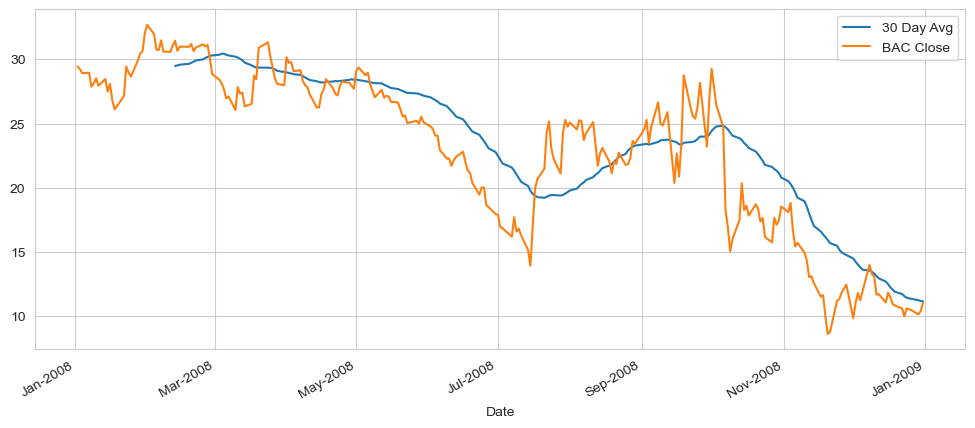

In [46]:
import matplotlib.dates as mdates
fig = plt.figure(figsize = (12,5))
s = fig.add_subplot(111)
s.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
bank_stocks[('Close','BAC')].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks[('Close','BAC')].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend(loc='upper right')

<Axes: xlabel='Ticker', ylabel='Ticker'>

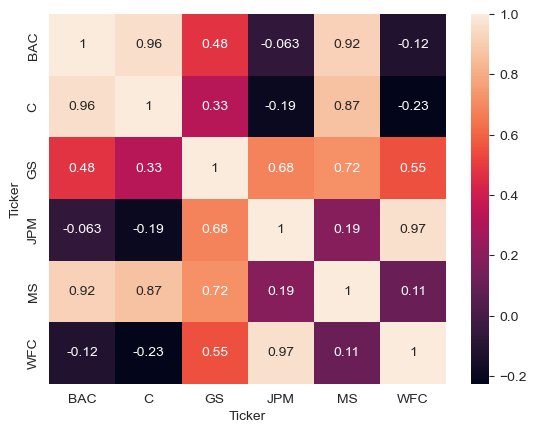

In [48]:
sns.heatmap(close.corr(), annot=True)

In [53]:
bank_stocks.xs('BAC', level='Ticker', axis=1)[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [56]:
bank_stocks[('Close','BAC')].loc['2008-01-01':'2008-12-31'].ta_plot(study='boll',title = "Bollinger Band Graph")

In [58]:
bank_stocks[('Close','BAC')].loc['2008-01-01':'2008-12-31'].ta_plot(study='sma',periods=[20,50],title = "SMA Graph")